# Telecom Churn Case Study

####                                                               Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


#### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

#### business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

#### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.


#### Data loading and understanding

In [2]:
# Let's start with the importing necessary libraries.

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
# Loading the data and analysing
data= pd.read_csv('telecom_churn_data.csv')
data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# Checking the shape of data 
data.shape

(99999, 226)

In [4]:
# Checking the statistical insight about the data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# Checking information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Identifying the unique customers from the data
len(data.mobile_number.unique())

99999

###  Data Cleaning

In [7]:
# This method helps to retrive the missing values in % from the given cutoff.
def getMissingValues(cutoffValue):
    missingData = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are  {} features in the data with more than {}% of missing values".format(len(missingData.loc[missingData > cutoffValue]),cutoffValue))
    return missingData.loc[missingData > cutoffValue]

In [8]:
# This method helps to impute nan values with 0
def imputeWithNan(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)            
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

### Missing data analysis

In [9]:
# Let's get the missing values
getMissingValues(70)

There are  40 features in the data with more than 70% of missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

In [10]:
# Let's impute the missing values with 0 
imputeColumn = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeWithNan(data,imputeColumn)

In [11]:
getMissingValues(70)

There are  4 features in the data with more than 70% of missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [12]:
# Dropping the date columns as they won't contribute much to our analysis
data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],axis=1,inplace=True)
data.shape

(99999, 222)

In [13]:
# getting missing values having nan values > 5% for each coulmns.
getMissingValues(6) 

There are  29 features in the data with more than 6% of missing values


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

In [14]:
#Lets check if the data is missing together for 29 columns 
missingcol = list(getMissingValues(6).index)
data[data[missingcol].isnull().all(axis=1)][missingcol].head()

There are  29 features in the data with more than 6% of missing values


,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Lets check the number of custermers having missing values together for the 29 features
len(data[data[missingcol].isnull().all(axis=1)])

7745

In [16]:
#imputing the NaN values with 0
imputeWithNan(data,missingColList=missingcol)

In [17]:
# Missing values per column expressed as % of total number of values
getMissingValues(2)

There are  89 features in the data with more than 2% of missing values


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [18]:
#Lets check if the data is missing together for 89 columns 
missingcol = list(getMissingValues(2).index)
data[data[missingcol].isnull().all(axis=1)][missingcol].head()

There are  89 features in the data with more than 2% of missing values


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Lets check the number of custermers having missing values together for the 29 features
len(data[data[missingcol].isnull().all(axis=1)])

381

In [20]:
#Lets drop such rows 
data=data[~data[missingcol].isnull().all(axis=1)]
data.shape

(99618, 222)

In [21]:
getMissingValues(2)

There are  89 features in the data with more than 2% of missing values


onnet_mou_6            4.0
onnet_mou_7            3.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           3.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          3.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          3.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       3.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       3.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       3.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       3.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           3.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       3.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       3.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       3.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [22]:
# Dropping the date column
missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')

In [23]:
# let's impute the missing values with 0 where the missing data is spread out 
imputeWithNan(data,missingColList=missingcol)

In [24]:
# Lets check if there still any missing values in data 
getMissingValues(0)

There are  9 features in the data with more than 0% of missing values


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [25]:
#Checking unique values in each column
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
print("\n********************** Unique values in columns *************************\n")
for c in col: 
    print(" %s : unique values are %s \n" % (c,data[c].unique()))


********************** Unique values in columns *************************

 loc_og_t2o_mou : unique values are [ 0. nan] 

 std_og_t2o_mou : unique values are [ 0. nan] 

 loc_ic_t2o_mou : unique values are [ 0. nan] 

 last_date_of_month_7 : unique values are ['7/31/2014' nan] 

 last_date_of_month_8 : unique values are ['8/31/2014' nan] 

 last_date_of_month_9 : unique values are ['9/30/2014' nan] 

 date_of_last_rech_7 : unique values are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014'] 

 date_of_last_rech_8 : unique values are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/1

In [26]:
# As few columns have only one unique value , lets impute them with mode 
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [27]:
#Lets check the values after imputation with mode
print("\n********************** Unique values in columns *************************\n")
for c in col: 
    print(" column %s : unique values are %s \n" % (c,data[c].unique()))


********************** Unique values in columns *************************

 column loc_og_t2o_mou : unique values are [0.] 

 column std_og_t2o_mou : unique values are [0.] 

 column loc_ic_t2o_mou : unique values are [0.] 

 column last_date_of_month_7 : unique values are ['7/31/2014'] 

 column last_date_of_month_8 : unique values are ['8/31/2014'] 

 column last_date_of_month_9 : unique values are ['9/30/2014'] 



In [28]:
getMissingValues(0)

There are  4 features in the data with more than 0% of missing values


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [29]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(data[data[missingcol].isnull().all(axis=1)])))

There are  4 features in the data with more than 0% of missing values
There are 22 rows in total having missing values for these variables.


In [30]:
#Lets impute these columns with last date of each month
data[data['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
data[data['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
data[data['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
data[data['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [31]:
#Let's check for columns having all values as 0
zero_columns=data.columns[(data == 0).all()]

In [32]:
zero_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [33]:
# lets drop the columns having all 0 values  
data.drop(zero_columns,axis=1,inplace=True)

In [34]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are  4 features in the data with more than 0% of missing values


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
date_of_last_rech_9    4.0
dtype: float64

In [35]:
# Percentage of data left after removing the missing values.
print("Total % of data remaining after missing value treatment : {}%".format(round(data.shape[0]/99999 *100,2)))
print ("Total Number of customers: {}".format(data.shape[0]))
print ("Total Number of features: {}".format(data.shape[1]))

Total % of data remaining after missing value treatment : 99.62%
Total Number of customers: 99618
Total Number of features: 211


###  Data type corrections

In [36]:
# Let's check for data types of the different columns.
data.reset_index(inplace=True,drop=True)
# Columns which holds date 
date_columns = list(data.filter(regex='date').columns)
data.dtypes[date_columns]

last_date_of_month_6    object
last_date_of_month_7    object
last_date_of_month_8    object
last_date_of_month_9    object
date_of_last_rech_6     object
date_of_last_rech_7     object
date_of_last_rech_8     object
date_of_last_rech_9     object
dtype: object

In [37]:
# Converting type of data into datetime wherever needed
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%m/%d/%Y')

In [38]:
data.dtypes[date_columns]

last_date_of_month_6    datetime64[ns]
last_date_of_month_7    datetime64[ns]
last_date_of_month_8    datetime64[ns]
last_date_of_month_9    datetime64[ns]
date_of_last_rech_6     datetime64[ns]
date_of_last_rech_7     datetime64[ns]
date_of_last_rech_8     datetime64[ns]
date_of_last_rech_9     datetime64[ns]
dtype: object

### Column names Correction

In [39]:
print(data.columns.tolist())

['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t

In [40]:
# Renaming columns into standard format
#'jun_vbc_3g' -> 'vbc_3g_6'
#'jul_vbc_3g' -> 'vbc_3g_7'
#'aug_vbc_3g' -> 'vbc_3g_8'
#'sep_vbc_3g' -> 'vbc_3g_9'

data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 
                     'jul_vbc_3g' : 'vbc_3g_7', 
                     'aug_vbc_3g' : 'vbc_3g_8',
                     'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [41]:
data.head()

,mobile_number,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
0,7000842753,109,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.1

### Data Preparation

- ####  Derive new features

In [42]:
# Lets create new features which stores the total data volume per month (vol_2g_mb_* + vol_3g_mb_*)
#'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

for i in range(6,10):
    data['vol_data_mb_'+str(i)] = (data['vol_2g_mb_'+str(i)]+data['vol_3g_mb_'+str(i)]).astype(int)

In [43]:
data[['vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9']].head()

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,vol_data_mb_9
0,113,152,115,0
1,0,108,365,0
2,0,0,0,8
3,0,0,0,0
4,0,0,0,0


In [44]:
# Using regex to get the count columns for recharge
rechcol = data.filter(regex=('count')).columns
data[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Lets create average recharge per customer in respective month.
# New features: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    data['avg_rech_amt_'+str(i)] = round(data['total_rech_amt_'+str(i)]/data['total_rech_num_'+str(i)]+1,2)
data[['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9']].head()

,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
0,91.5,85.00,127.00,1.00
1,19.5,43.67,26.73,25.20
2,34.6,79.75,59.00,52.14
3,24.0,29.18,34.39,30.29
4,40.2,59.33,96.67,51.00


In [46]:
#Imputing Nan values if any with 0.
imputeWithNan(data,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

In [47]:
# Lets create total number of data recharge per customer in respective month (count_rech_2g + count_rech_3g ).
# New features: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    data['total_rech_num_data_'+str(i)] = (data['count_rech_2g_'+str(i)]+data['count_rech_3g_'+str(i)]).astype(int)
data[['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8','total_rech_num_data_9']].head()

,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
0,1,1,1,0
1,0,1,2,0
2,0,0,0,1
3,0,0,0,0
4,1,0,0,0


In [48]:
# Lets create total amount of data recharge per customer in respective month (total_rech_num_data * av_rech_amt_data ).
# New features: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    data['total_rech_amt_data_'+str(i)] = data['total_rech_num_data_'+str(i)]*data['av_rech_amt_data_'+str(i)]
data[['total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8','total_rech_amt_data_9']].head()

,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,252.0,252.0,252.0,0.0
1,0.0,154.0,100.0,0.0
2,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,0.0
4,56.0,0.0,0.0,0.0


In [49]:
# Lets create total recharge amount per customer in respective month ( total_rech_amt + total_rech_amt_data ).
#New feature: total_month_rech_6, total_month_rech_7, total_month_rech_8, total_month_rech_9
for i in range(6,10):
    data['total_month_rech_'+str(i)] = data['total_rech_amt_'+str(i)]+data['total_rech_amt_data_'+str(i)]
data[['total_month_rech_6', 'total_month_rech_7', 'total_month_rech_8', 'total_month_rech_9']].head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


- #### Filter high-value customers

We need to predict churn only for the high-value customers. 

High-value customers can be defined as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [50]:
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(data.total_month_rech_6 + data.total_month_rech_7)/2
avg_goodPhase

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99613      85.0
99614     110.0
99615      98.5
99616    1602.0
99617     432.0
Length: 99618, dtype: float64

In [51]:
# Lets figure out the cutoff based on 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(avg_goodPhase,70)
hv_cutoff

479.5

In [52]:
# Now lets filter the users whos good phase average recharge amount > 479.5
hv_users = data[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

In [53]:
hv_users.shape

(29906, 231)

 - There are **29906** High-Value customers. 

#### 3. Tag churners and remove attributes of the churn phase


Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes we need to use to tag churners are:
 - total_ic_mou_9
 - total_og_mou_9
 - vol_2g_mb_9
 - vol_3g_mb_9

After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [54]:
churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
flag = ~hv_users[[s + str(9) for s in churn_features ]].any(axis=1)
hv_users['churn'] = flag.map({True:1, False:0})

In [55]:
round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)

8.09

In [56]:
hv_users['churn'].value_counts()

0    27488
1     2418
Name: churn, dtype: int64

Around **2418 (8.09%)** customer are tagged as chrners out of **29906** High-Value Customers.

This indicated an **highly imbalanced** data set where the churn cases are the minority compared to the non-churners 

##  Data Analysis

In [57]:
# Lets remove all the features corresponding to the churn phase 
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

In [58]:
# list of column which are not monthly columns
columns = hv_users.filter(regex='_[6-9]').columns
nonmonthlycol = [col for col in hv_users.columns if col not in columns]
nonmonthlycol

['mobile_number', 'circle_id', 'aon', 'churn']

###### Feature Analysis: circle_id

In [59]:
# Getting the distinct circle_id's in the data
hv_users.circle_id.value_counts()

109    29906
Name: circle_id, dtype: int64

In [60]:
#There is only one vaue for circle_id , lets drop it as it is not going to help in analysis 
hv_users.drop('circle_id',axis=1,inplace=True)

###### Feature Analysis : aon


In [61]:
# Function to plot the histogram with labels
# https://stackoverflow.com/questions/6352740/matplotlib-label-each-bin

def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()
    

In [62]:
# Getting the distinct circle_id's in the data
hv_users.aon.value_counts()

3651    457
2372    181
495     114
494      85
492      74
       ... 
3583      1
1926      1
3436      1
1638      1
3619      1
Name: aon, Length: 3294, dtype: int64

In [63]:
#Create Derived categorical variable - converting in num of days to year 
hv_users['aon_bin'] = pd.cut(data['aon'], range(0,data['aon'].max(),365), labels=range(0,int(round(data['aon'].max()/365))-1))

In [64]:
hv_users.aon_bin.value_counts()

1     7855
0     5173
2     4605
3     2989
6     2027
4     1823
7     1679
8     1522
5     1283
9      508
10     423
Name: aon_bin, dtype: int64

In [65]:
def showLabelsPer(ax, d=None):
   plt.margins(0.2, 0.2)
   rects = ax.patches
   i = 0
   locs, labels = plt.xticks()
   counts = {}
   if not d is None:
       for key, value in d.items():
           counts[str(key)] = value

   # For each bar: Place a label
   for rect in rects:
       # Get X and Y placement of label from rect.
       y_value = rect.get_height()
       x_value = rect.get_x() + rect.get_width() / 2

       # Number of points between bar and label. Change to your liking.
       space = 5
       # Vertical alignment for positive values
       va = 'bottom'

       # If value of bar is negative: Place label below bar
       if y_value < 0:
           # Invert space to place label below
           space *= -1
           # Vertically align label at top
           va = 'top'

       # Use Y value as label and format number with one decimal place
       if d is None:
           label = "{:.1f}%".format(y_value)
       else:
           try:
               #label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
               label = "{:.1f}%".format(y_value)
           except:
               label = "{:.1f}%".format(y_value)
       
       i = i+1

       # Create annotation
       plt.annotate(
           label,                      # Use `label` as label
           (x_value, y_value),         # Place label at end of the bar
           xytext=(0, space),          # Vertically shift label by `space`
           textcoords="offset points", # Interpret `xytext` as offset in points
           ha='center',                # Horizontally center label
           va=va)                      # Vertically align label differently for
                                       # positive and negative values.

In [66]:
hv_users.aon.describe()

count    29906.000000
mean      1209.062396
std        957.342718
min        180.000000
25%        460.000000
50%        846.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64

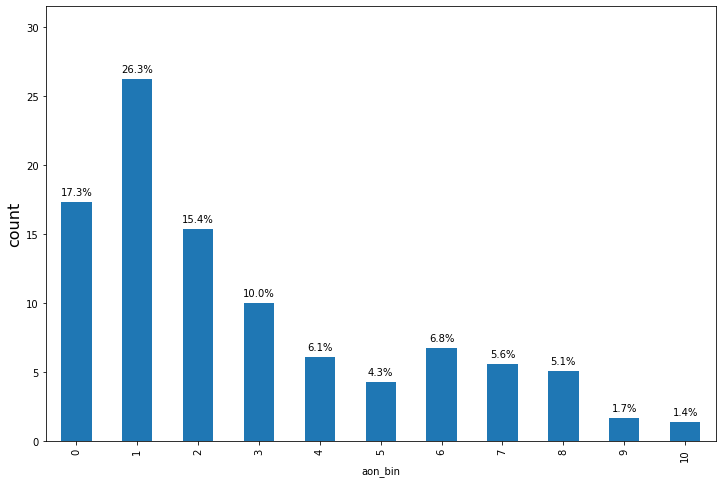

In [67]:
plt.figure(figsize=(12,8))
ax = (hv_users.groupby('aon_bin').aon_bin.count() * 100 / len(hv_users.aon_bin)).plot.bar()
ax.set_ylabel('count', fontsize=16)
plt.margins(0.2, 0.2)
showLabelsPer(ax)
plt.show()

Analysis as per the above data on aon: 
- **Minimun Age** on network : 180 days.
- **Average age** on network : 1200 days (3.2 years).
- Around 17.3 % of HV customers are in 1st year of the subscription 
- Around 26.3 % of HV customers are in 2nd year of the subscription 
- Almost 71% users have Age on network **less than 4 years.**
- 15% users are with the network from **over 7 years.**

#### Univariate and bivariate analysis

- #### Incoming MOU  VS month 

In [68]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    fig,ax = plt.subplots(figsize=(8,4))
    ax.plot(data[colList].mean())
    ax.set_xticklabels(['Jun','Jul','Aug'])
        
    # Add titles
    plt.title(" Avg. "+calltype+" MOU  V/S Month", loc='center', fontsize=12, fontweight=0, color='black')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")
    plt.show()

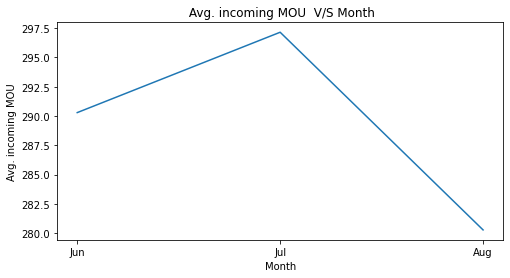

In [69]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)


 - Total incoming MOU is declined as compared to june and july , 

- #### Outgoing MOU  VS month

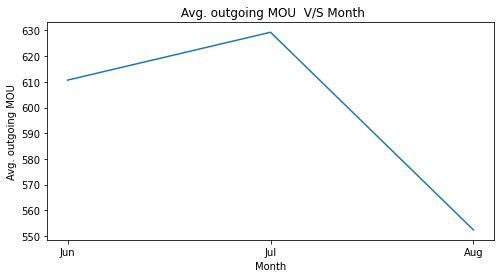

In [70]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)

- Total outgoing MOU is decreasing as compared to june and july.

- ###### Incoming/Outgoing MOU VS Churn 

In [71]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='center', fontsize=12, fontweight=0, color='blue')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

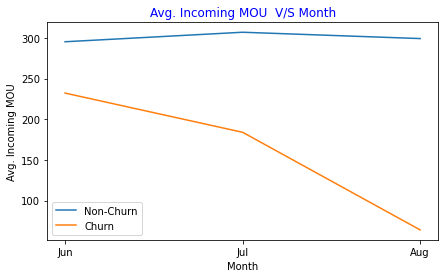

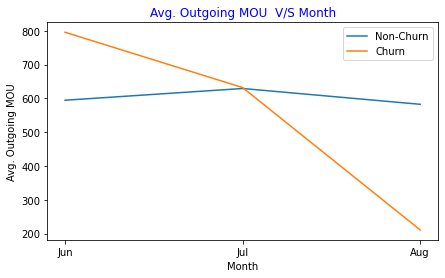

In [72]:
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

- The Avg. Incoming/Outgoing MOU's its stable for non churners whereas **drops drastically after July.** for churners.
- We see MOU plays important role in predicting churners

- ###### Total data volume VS Churn 

In [73]:
def plot_byChurn(data,col):
   # per month churn vs Non-Churn
   fig, ax = plt.subplots(figsize=(7,4))
   colList=list(data.filter(regex=(col)).columns)
   colList = colList[:3]
   plt.plot(hv_users.groupby('churn')[colList].mean().T)
   ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
   ## Add legend
   plt.legend(['Non-Churn', 'Churn'])
   # Add titles
   plt.title( str(col) +" V/S Month", loc='center', fontsize=12, fontweight=0, color='black',)
   plt.xlabel("Month")
   plt.ylabel(col)
   plt.show()

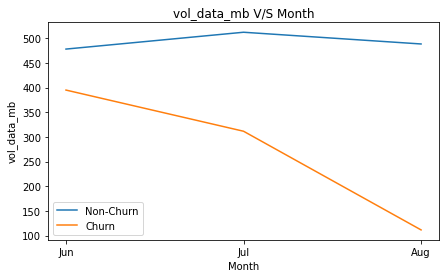

In [74]:
plot_byChurn(hv_users,'vol_data_mb')

- We see significant drop in data usage bu cherners.
- However , it remains same for non churners

- ###### Total monthly rech VS Churn 

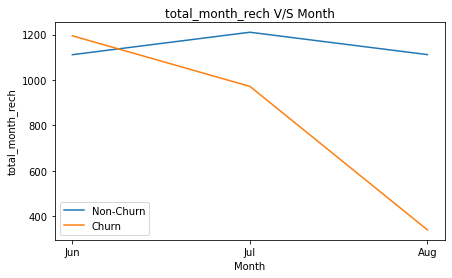

In [75]:
plot_byChurn(hv_users,'total_month_rech')

 - We also see significant drop in total monthly recharge amount for churners.
 - However, for non-churners the total monthly recharge amount remains stable.
 

- ###### max_rech_amt VS Churn 

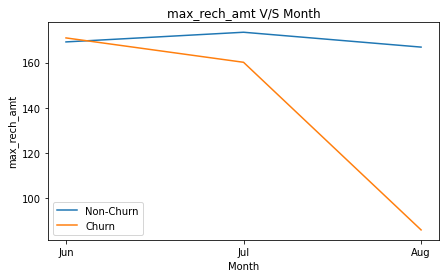

In [76]:
plot_byChurn(hv_users,'max_rech_amt')

 - We as well see significant drop in maximum recharge amount for churners.
 - Whereas, for non-churners the maximum recharge amount remains consistent.
 

- ###### arpu VS Churn 

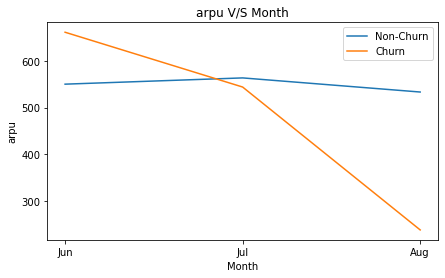

In [77]:
plot_byChurn(hv_users,'arpu')

 - From the plot its evident that the Average Revenue Per User (ARPU) drops significantly for churners.
 - In case of non-churners the ARPU is stable 

In [78]:
# Lets create Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8 features

for i in range(6,9):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])

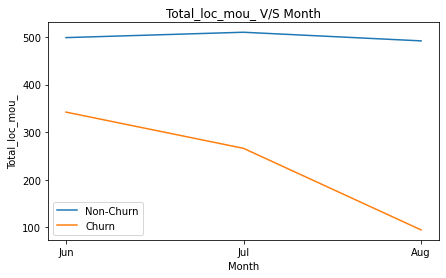

In [79]:
plot_byChurn(hv_users,'Total_loc_mou_')

 - Its seen the local incoming + outgoing MOU for churners is low in June and July (Good Phase) and drops significantly after July.
 - On the other hand for non-churners the local MOU is almost constant.
 - This indicate a crucial pattern where customers who tend to make less incoming or outgoing calls in their tenure are more likely to churn.
 

In [80]:
#Lets create new features.
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8 (roam_ic_mou+roam_og_mou) for each month
for i in range(6,9):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])

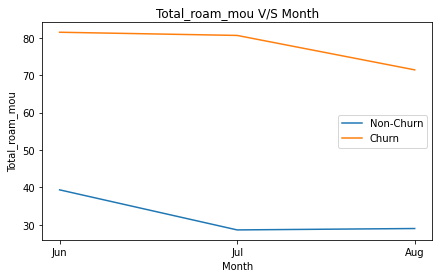

In [81]:
plot_byChurn(hv_users,'Total_roam_mou')

 - From the plot its evident the the roaming usage of churners is way higher than those of non-churners across all months.
 - Customers who are making/reciving more roaming calls during their tenure are more likely to churn.

- ###### last_day_rch_amt VS Churn 

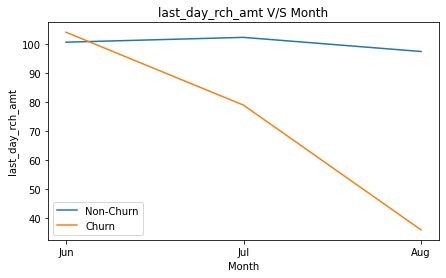

In [82]:
plot_byChurn(hv_users,'last_day_rch_amt')

- Its clear that average last recharge amount for the churners drops significalty.
- For non-churners the last recharge amount remains consistent.
- This is one of the important feature or indicator to predict the Churners.

In [83]:
# removing the columns which will not be usefull in modeling process.
hv_users.drop(['mobile_number', 'aon_bin'], axis=1, inplace=True)

# removing the datatime columns before PCA
dateTimeCols = list(hv_users.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [84]:
hv_users.shape

(29906, 173)

## Modeling

In [85]:
# We have created High Value customers dataframe after data cleanup and renaming. 
#Let's take backup and work with copy of high value customer dataframe.

hv_users_PCA = hv_users.copy()

In [86]:
hv_users_PCA.shape

(29906, 173)

In [87]:
#creating independant variables dataframe X
X = hv_users_PCA.drop(['churn'], axis=1)

#Creating dependant variables dataframe y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [88]:
#Rescaling the features 
scaler = MinMaxScaler()

In [89]:
#Applying the scalar tranformation on Train and test data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information



In [90]:
print("\n***********  stats of dataframe before oversampling ************************\n")
print("counts of churn '1': {}".format(sum(y_train==1)))
print("counts of non-churn '0': {} \n".format(sum(y_train==0)))
print("churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))


***********  stats of dataframe before oversampling ************************

counts of churn '1': 1700
counts of non-churn '0': 19234 

churn event rate : 8.12% 



In [91]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [92]:
print("\n***********  stats of dataframe after oversampling ************************\n")
print('X_train_res : {}'.format(X_train_res.shape))
print('y_train_res: {} \n'.format(y_train_res.shape))

print("counts of churn '1': {}".format(sum(y_train_res==1)))
print("counts of non-churn '0': {}".format(sum(y_train_res==0)))
print("churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))


***********  stats of dataframe after oversampling ************************

X_train_res : (38468, 172)
y_train_res: (38468,) 

counts of churn '1': 19234
counts of non-churn '0': 19234
churn event rate : 50.0% 



### PCA

In [93]:
pca = PCA(svd_solver='randomized', random_state=42)

In [94]:
#Lets do PCA on the train dataset
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

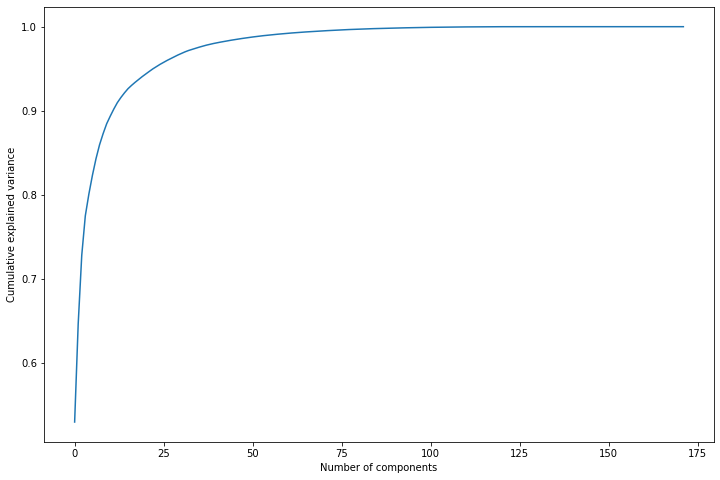

In [95]:
#screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [96]:
pca.explained_variance_ratio_[:35]

array([0.52955481, 0.11675729, 0.08173288, 0.04692631, 0.02586223,
       0.02239205, 0.01966498, 0.0166032 , 0.01322945, 0.01178609,
       0.00899953, 0.00844578, 0.0076767 , 0.00613273, 0.00549231,
       0.0049856 , 0.00395248, 0.00364998, 0.00346207, 0.00334334,
       0.00313739, 0.00308518, 0.00300732, 0.00267852, 0.00263704,
       0.00239567, 0.00232399, 0.00217149, 0.00211947, 0.00208066,
       0.00192993, 0.00182575, 0.00161729, 0.00134948, 0.0013291 ])

In [97]:
sum(pca.explained_variance_ratio_[:35])

0.9743380899710528

- As per screeplot 97% variance in the dataset has been explained by 35 components
- Hence we will select 35 components for our model building**

In [98]:
#Lets do incremental PCA
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [99]:
#fitting the model
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38468, 35)

In [100]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.015433777970294141 , min corr:  -0.017649523815901343


The reason we select PCA is to reduce the dimentionality and multicolinearity , to acheive high accuracy in model . We can notice that, the multicolinearity has been reduced :

 - **max corr**: 0.015433777970294141 
 - **min corr**:  -0.017649523815901343

In [101]:
#Lets apply selected components to the test data 
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8972, 35)

Let's create different models for predicting churn customers and select best churn predicter .

    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. XGBoost Classifier

### 1. Logistic Regression


In [102]:
#Training the model on the train data
lr = LogisticRegression(class_weight='balanced')

In [103]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\n ******** Model Metrics on Train data ************* \n")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [104]:
modelfit(lr, X_train_pca, y_train_res)


 ******** Model Metrics on Train data ************* 

Accuracy : 0.827
Recall/Sensitivity : 0.8416
AUC Score (Train): 0.899890
CV Score : Mean - 0.8990741 | Std - 0.002117464 | Min - 0.896584 | Max - 0.9029354


In [105]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("\n************** Model Metrics ******************\n")
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    print("\n************************************************\n")

In [106]:
# predictions on Test data
pred_probs_test = lr.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)


************** Model Metrics ******************

Roc_auc_score : 0.8174242183919604
Sensitivity/Recall : 0.8203342618384402
Specificity: 0.814514174945481
False Positive Rate: 0.18548582505451902
Positive predictive value: 0.2778301886792453
Negative Predictive value: 0.9811733800350263
sklearn precision score value: 0.2778301886792453

************************************************



In [107]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8149799375835934
Recall : 0.8203342618384402
Precision : 0.2778301886792453


In [108]:
# Funtion to predict the churn using the input probability cut-off
# Input arguments: model instance, x and y to predict using model and cut-off probability
def predictChurnWithProb(model,X,y,prob):
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [109]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.8269730685244879
Sensitivity/Recall : 0.8415826141208277
Specificity: 0.8123635229281481
False Positive Rate: 0.18763647707185194
Positive predictive value: 0.8176904425136391
Negative Predictive value: 0.8368144815766924
sklearn precision score value: 0.8176904425136391

************************************************



,churn,churn_Prob,final_predicted
0,0,0.723502,1
1,0,0.008617,0
2,0,0.126303,0
3,0,0.023110,0
4,0,0.840025,1


**Plotting the ROC Curve :**
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

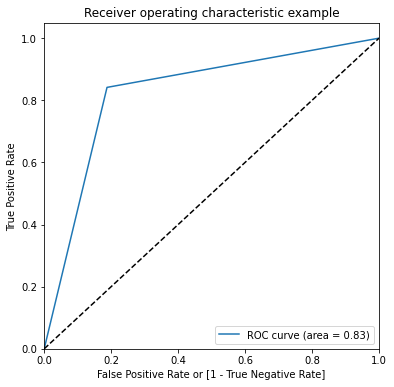

(array([0.        , 0.18763648, 1.        ]),
 array([0.        , 0.84158261, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [111]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [112]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.83


**Finding Optimal Cutoff Point**<br>
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

In [113]:
#Function to find the optimal cutoff for classifing as churn/non-churn
# Let's create columns with different probability cutoffs 
def findOptimalCutoff(df):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672585  0.980191  0.364979
0.2   0.2  0.742227  0.954144  0.530311
0.3   0.3  0.784678  0.920765  0.648591
0.4   0.4  0.813247  0.886451  0.740044
0.5   0.5  0.826973  0.841583  0.812364
0.6   0.6  0.828611  0.783144  0.874077
0.7   0.7  0.814261  0.713008  0.915514
0.8   0.8  0.773370  0.596080  0.950660
0.9   0.9  0.596366  0.207653  0.985079


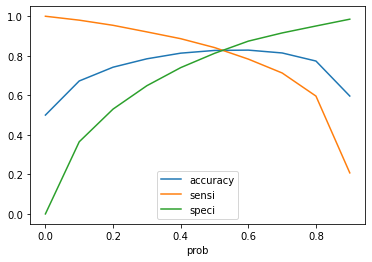

In [114]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

- #### **From the curve above, 0.45 is the optimum point .**
- to keep the test sensitivity/recall significant we can choose 0.45,  at this point there is a balance of sensitivity, specificity and accuracy.

In [115]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr,X_train_pca,y_train_res,cut_off_prob)


************** Model Metrics ******************

Roc_auc_score : 0.8210460642612042
Sensitivity/Recall : 0.8647187272538214
Specificity: 0.7773734012685869
False Positive Rate: 0.22262659873141313
Positive predictive value: 0.7952567658028115
Negative Predictive value: 0.8517716759712886
sklearn precision score value: 0.7952567658028115

************************************************



,churn,churn_Prob,final_predicted
0,0,0.723502,1
1,0,0.008617,0
2,0,0.126303,0
3,0,0.023110,0
4,0,0.840025,1
...,...,...,...
38463,1,0.834555,1
38464,1,0.880442,1
38465,1,0.737580,1
38466,1,0.875296,1


**Making prediction on test**

In [116]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr,X_test_pca,y_test,cut_off_prob)


************** Model Metrics ******************

Roc_auc_score : 0.8114230763779258
Sensitivity/Recall : 0.8426183844011143
Specificity: 0.7802277683547371
False Positive Rate: 0.2197722316452629
Positive predictive value: 0.25010334849111204
Negative Predictive value: 0.9827559896230734
sklearn precision score value: 0.25010334849111204

************************************************



,churn,churn_Prob,final_predicted
4265,0,0.443572,0
29221,0,0.578012,1
974,0,0.392530,0
1602,0,0.310413,0
10225,0,0.158611,0
...,...,...,...
6262,0,0.204907,0
1424,0,0.042723,0
18308,0,0.264066,0
22978,0,0.105703,0


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.
- **train sensitivity  :** 86.47%
- **train roc auc score  :** 82.1%
- **test sensitivity   :** 84.40%
- **test roc auc score  :** 81.21%

##### Summary DataFrame

In [3]:
summary_df = pd.DataFrame(columns=['Model Name', 'Train:Roc_auc_score', 'Test:Roc_auc_score', 'Train:Sensitivity/Recall', 'Test:Sensitivity/Recall', 'Train:Specificity', 'Test:Specificity', 'Train:precision', 'Test:precision']) 

In [4]:
summary_df = summary_df.append({'Model Name':'Logistic Regression', 
                                'Train:Roc_auc_score':'82.1%', 
                                'Test:Roc_auc_score':'81.14%', 
                                'Train:Sensitivity/Recall':'86.47%', 
                                'Test:Sensitivity/Recall':'84.26%', 
                                'Train:Specificity':'77.73%', 
                                'Test:Specificity':'78.02%', 
                                'Train:precision':'79.25%', 
                                'Test:precision':'25.01%'}, 
                               ignore_index=True)

In [5]:
summary_df

,Model Name,Train:Roc_auc_score,Test:Roc_auc_score,Train:Sensitivity/Recall,Test:Sensitivity/Recall,Train:Specificity,Test:Specificity,Train:precision,Test:precision
0,Logistic Regression,82.1%,81.14%,86.47%,84.26%,77.73%,78.02%,79.25%,25.01%


### 2. Decision Tree

Lets build Decision Tree model on our principal components with Hyperparameter tuning

In [120]:
dt0 = DecisionTreeClassifier(max_depth=6)                  
modelfit(dt0, X_train_pca, y_train_res)


 ******** Model Metrics on Train data ************* 

Accuracy : 0.8206
Recall/Sensitivity : 0.8278
AUC Score (Train): 0.881995
CV Score : Mean - 0.8694169 | Std - 0.004143828 | Min - 0.8619513 | Max - 0.8735816


In [121]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)


************** Model Metrics ******************

Roc_auc_score : 0.7575651680319764
Sensitivity/Recall : 0.7047353760445683
Specificity: 0.8103949600193845
False Positive Rate: 0.18960503998061545
Positive predictive value: 0.24432641236117816
Negative Predictive value: 0.9692798145196349
sklearn precision score value: 0.24432641236117816

************************************************



In [122]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [123]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   36.0s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [124]:
# printing the optimal accuracy score and hyperparameters
#print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)
print('Best score : ',grid_search.best_score_)
print('Best parameters : ',grid_search.best_params_)

Best score :  0.8103206271313276
Best parameters :  {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [125]:
# Lets create model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=14,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [126]:
modelfit(dt_final,X_train_pca,y_train_res)


 ******** Model Metrics on Train data ************* 

Accuracy : 0.8291
Recall/Sensitivity : 0.8479
AUC Score (Train): 0.916465
CV Score : Mean - 0.8897216 | Std - 0.002441156 | Min - 0.886831 | Max - 0.8940886


In [127]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)


************** Model Metrics ******************

Roc_auc_score : 0.7491770681961917
Sensitivity/Recall : 0.6949860724233984
Specificity: 0.8033680639689847
False Positive Rate: 0.19663193603101525
Positive predictive value: 0.2351555136663525
Negative Predictive value: 0.968029197080292
sklearn precision score value: 0.2351555136663525

************************************************



In [128]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8254
           1       0.24      0.69      0.35       718

    accuracy                           0.79      8972
   macro avg       0.60      0.75      0.61      8972
weighted avg       0.91      0.79      0.84      8972



As seen above after hyperparameter tuning the recall rate is 69%, which is not significant in predicting the churn.

Let's figure out the optimal cut-off for better prediction.

In [129]:
# Let's predict churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.8291307060413851
Sensitivity/Recall : 0.8479255485078507
Specificity: 0.8103358635749194
False Positive Rate: 0.1896641364250806
Positive predictive value: 0.8172069950393346
Negative Predictive value: 0.841985846253579
sklearn precision score value: 0.8172069950393346

************************************************



,churn,churn_Prob,final_predicted
0,0,0.670330,1
1,0,0.132597,0
2,0,0.130000,0
3,0,0.151515,0
4,0,0.817568,1


     prob  accuracy     sensi     speci
0.0   0.0  0.601825  1.000000  0.203650
0.1   0.1  0.721821  0.988562  0.455080
0.2   0.2  0.776126  0.965946  0.586306
0.3   0.3  0.813819  0.928668  0.698971
0.4   0.4  0.823464  0.906260  0.740668
0.5   0.5  0.829131  0.847926  0.810336
0.6   0.6  0.822294  0.770823  0.873765
0.7   0.7  0.801237  0.678174  0.924301
0.8   0.8  0.767157  0.578507  0.955807
0.9   0.9  0.694577  0.404076  0.985079


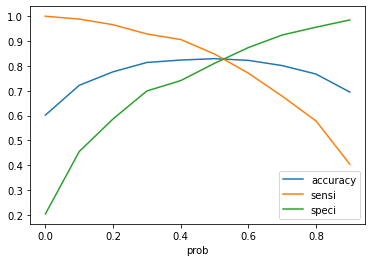

In [130]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

- **From the above curve and stats, let's select 0.4 as optimum point , which has high sensitivity.**

In [131]:
# predicting churn with cut-off 0.4
cut_off_prob=0.4
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.8234636581054383
Sensitivity/Recall : 0.9062597483622752
Specificity: 0.7406675678486014
False Positive Rate: 0.25933243215139856
Positive predictive value: 0.7775101476426246
Negative Predictive value: 0.8876565518100816
sklearn precision score value: 0.7775101476426246

************************************************



,churn,churn_Prob,final_predicted
0,0,0.670330,1
1,0,0.132597,0
2,0,0.130000,0
3,0,0.151515,0
4,0,0.817568,1


At 0.4 cut-off prob, there is a balance of sensitivity , specificity and accuracy.


In [132]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.7523128821477962
Sensitivity/Recall : 0.7729805013927576
Specificity: 0.7316452629028349
False Positive Rate: 0.268354737097165
Positive predictive value: 0.2003610108303249
Negative Predictive value: 0.9737181554337311
sklearn precision score value: 0.2003610108303249

************************************************



,churn,churn_Prob,final_predicted
4265,0,0.130000,0
29221,0,0.552239,1
974,0,0.417391,1
1602,0,0.078261,0
10225,0,0.000000,0


#### Decision Tree metrics after hyper-parameter tuning and optimal cut-off selection:

- **Train Recall : 90.6%**
- **Train Roc_auc_score : 82.34**
- **Test Recall : 77.29%** 
- **Test Roc_auc_score : 75.23**

 **Decision tree looks overfitting** to the data as we see significant difference between train and test results 

In [6]:
summary_df = summary_df.append({'Model Name':'Decision Tree', 
                                'Train:Roc_auc_score':'82.34%', 
                                'Test:Roc_auc_score':'75.23%', 
                                'Train:Sensitivity/Recall':'90.62%', 
                                'Test:Sensitivity/Recall':'77.29%', 
                                'Train:Specificity':'74.06%', 
                                'Test:Specificity':'73.16%', 
                                'Train:precision':'77.75%', 
                                'Test:precision':'20.03%'}, 
                               ignore_index=True)

In [7]:
summary_df

,Model Name,Train:Roc_auc_score,Test:Roc_auc_score,Train:Sensitivity/Recall,Test:Sensitivity/Recall,Train:Specificity,Test:Specificity,Train:precision,Test:precision
0,Logistic Regression,82.1%,81.14%,86.47%,84.26%,77.73%,78.02%,79.25%,25.01%
1,Decision Tree,82.34%,75.23%,90.62%,77.29%,74.06%,73.16%,77.75%,20.03%


### 3. Random Forest


####  Lets build Random Forest Classifier on our principal components with Hyperparameter tuning

In [135]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf1 = RandomForestClassifier()
# Instantiate the grid search model
rfgs1 = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
rfgs1.fit(X_train_pca,y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 26.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [136]:
rf_best = rfgs1.best_estimator_

In [137]:
rf_best

RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

#### Tunned Random Forest

In [139]:
rf_final = RandomForestClassifier(max_depth=12,
                                  n_estimators=200,
                                  max_features=12,
                                  min_samples_leaf=100,
                                  min_samples_split=200,
                                  random_state=42)

print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

 ******** Model Metrics on Train data ************* 

Accuracy : 0.8589
Recall/Sensitivity : 0.8578
AUC Score (Train): 0.939310
CV Score : Mean - 0.9221703 | Std - 0.002991531 | Min - 0.9167325 | Max - 0.9246795


In [140]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [141]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:

************** Model Metrics ******************

Roc_auc_score : 0.8003547532959456
Sensitivity/Recall : 0.7479108635097493
Specificity: 0.852798643082142
False Positive Rate: 0.14720135691785802
Positive predictive value: 0.3065068493150685
Negative Predictive value: 0.9749307479224377
sklearn precision score value: 0.3065068493150685

************************************************



After hyperparameter tuning for the random forest, The Recall rate(Test) is 73.39%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [142]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.858921701154206
Sensitivity/Recall : 0.8578038889466569
Specificity: 0.8600395133617552
False Positive Rate: 0.13996048663824479
Positive predictive value: 0.8597259131884738
Negative Predictive value: 0.8581210769310578
sklearn precision score value: 0.8597259131884738

************************************************



,churn,churn_Prob,final_predicted
0,0,0.524710,1
1,0,0.023037,0
2,0,0.219771,0
3,0,0.272713,0
4,0,0.829672,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.622569  1.000000  0.245139
0.2   0.2  0.753665  0.991161  0.516169
0.3   0.3  0.826401  0.963554  0.689248
0.4   0.4  0.854035  0.916554  0.791515
0.5   0.5  0.858922  0.857804  0.860040
0.6   0.6  0.849433  0.787148  0.911719
0.7   0.7  0.818447  0.687532  0.949361
0.8   0.8  0.753379  0.528595  0.978164
0.9   0.9  0.610325  0.223874  0.996777


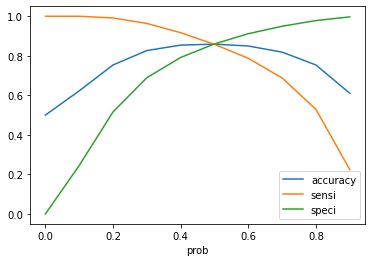

In [143]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

- **From the curve above, 0.45 is the optimal point with high enough sensitivity.**

In [144]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)


************** Model Metrics ******************

Roc_auc_score : 0.8578558802121243
Sensitivity/Recall : 0.8872829364666736
Specificity: 0.8284288239575751
False Positive Rate: 0.17157117604242486
Positive predictive value: 0.8379652361779436
Negative Predictive value: 0.8802342282620705
sklearn precision score value: 0.8379652361779436

************************************************



,churn,churn_Prob,final_predicted
0,0,0.524710,1
1,0,0.023037,0
2,0,0.219771,0
3,0,0.272713,0
4,0,0.829672,1
...,...,...,...
38463,1,0.714367,1
38464,1,0.931177,1
38465,1,0.872760,1
38466,1,0.881222,1


**Making prediction on test**

In [145]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.8008032570348267
Sensitivity/Recall : 0.7799442896935933
Specificity: 0.8216622243760601
False Positive Rate: 0.1783377756239399
Positive predictive value: 0.2755905511811024
Negative Predictive value: 0.9772334293948127
sklearn precision score value: 0.2755905511811024

************************************************



,churn,churn_Prob,final_predicted
4265,0,0.457137,1
29221,0,0.335450,0
974,0,0.556716,1
1602,0,0.390121,0
10225,0,0.189500,0


Below is the stats for Random Forest after selecting optimal cut-off :

Train Recall : **88.72%** and Train Roc_auc_score : **85.78**

Test Recall : **77.99%** and Test Roc_auc_score : **80.00**

In [8]:
summary_df = summary_df.append({'Model Name':'Random Forest', 
                                'Train:Roc_auc_score':'85.78%', 
                                'Test:Roc_auc_score':'80.08%', 
                                'Train:Sensitivity/Recall':'88.72%', 
                                'Test:Sensitivity/Recall':'77.99%', 
                                'Train:Specificity':'82.84%', 
                                'Test:Specificity':'82.16%', 
                                'Train:precision':'83.79%', 
                                'Test:precision':'27.55%'}, 
                               ignore_index=True)

In [9]:
summary_df

,Model Name,Train:Roc_auc_score,Test:Roc_auc_score,Train:Sensitivity/Recall,Test:Sensitivity/Recall,Train:Specificity,Test:Specificity,Train:precision,Test:precision
0,Logistic Regression,82.1%,81.14%,86.47%,84.26%,77.73%,78.02%,79.25%,25.01%
1,Decision Tree,82.34%,75.23%,90.62%,77.29%,74.06%,73.16%,77.75%,20.03%
2,Random Forest,85.78%,80.08%,88.72%,77.99%,82.84%,82.16%,83.79%,27.55%


### 4. Boosting models - XGBoost Classifier

##### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [148]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [149]:
import xgboost as xgb
from sklearn import metrics

xgb1 = xgb.XGBClassifier()

# Model fit and performance on Train data
#modelfit(xgb1, X_train_pca, y_train_res)
xgb1.fit(X_train_pca, y_train_res)

[17:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
from sklearn import model_selection

xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_pca, y_train_res)

[17:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [151]:
print(clf_xgb.best_params_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}


In [152]:
print(clf_xgb.best_score_)


0.9748243598176675


In [153]:
print(clf_xgb.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [154]:
# Run for best hyperparameters
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4],
              'max_depth': [4, 6, 8],
              'min_child_weight': [1, 3, 7],
              'n_estimators': [50, 100, 150]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True,
                                      verbose=1)

clf_xgb.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 16.9min finished


[17:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [155]:
print(clf_xgb.best_params_)


{'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 150}


In [156]:
print(clf_xgb.best_score_)


0.9857841435211633


In [157]:
print(clf_xgb.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [158]:
# Final XGBClassifier
xgb2 = xgb.XGBClassifier( learning_rate=0.4, 
                         n_estimators=150, 
                         max_depth=5,
                         min_child_weight=1, 
                         objective= 'binary:logistic', 
                         nthread=4, 
                         scale_pos_weight=1,
                         seed=27)

In [159]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)

[17:31:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [160]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [161]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)


************** Model Metrics ******************

Roc_auc_score : 0.7657286785237241
Sensitivity/Recall : 0.616991643454039
Specificity: 0.9144657135934092
False Positive Rate: 0.08553428640659075
Positive predictive value: 0.3855526544821584
Negative Predictive value: 0.9648472453023137
sklearn precision score value: 0.3855526544821584

************************************************



Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.



In [162]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.9816990745554747
Sensitivity/Recall : 0.9927732141000312
Specificity: 0.9706249350109182
False Positive Rate: 0.029375064989081833
Positive predictive value: 0.9712614445574771
Negative Predictive value: 0.992609527860485
sklearn precision score value: 0.9712614445574771

************************************************



,churn,churn_Prob,final_predicted
0,0,0.076245,0
1,0,0.000894,0
2,0,0.200608,0
3,0,0.067025,0
4,0,0.507117,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.906052  0.999948  0.812156
0.2   0.2  0.948243  0.999740  0.896745
0.3   0.3  0.966830  0.998804  0.934855
0.4   0.4  0.977020  0.996777  0.957263
0.5   0.5  0.981699  0.992773  0.970625
0.6   0.6  0.981959  0.983987  0.979931
0.7   0.7  0.977696  0.967505  0.987886
0.8   0.8  0.960825  0.927888  0.993761
0.9   0.9  0.896121  0.794842  0.997400


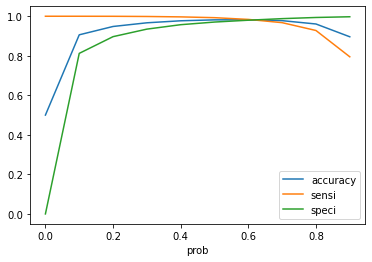

In [163]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [164]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)


************** Model Metrics ******************

Roc_auc_score : 0.9482426952272017
Sensitivity/Recall : 0.999740043672663
Specificity: 0.8967453467817407
False Positive Rate: 0.10325465321825933
Positive predictive value: 0.9063869903370257
Negative Predictive value: 0.9997101953283487
sklearn precision score value: 0.9063869903370257

************************************************



,churn,churn_Prob,final_predicted
0,0,0.076245,0
1,0,0.000894,0
2,0,0.200608,1
3,0,0.067025,0
4,0,0.507117,1
...,...,...,...
38463,1,0.979195,1
38464,1,0.889477,1
38465,1,0.787987,1
38466,1,0.989371,1


##### Making prediction on test



In [165]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()


************** Model Metrics ******************

Roc_auc_score : 0.7875730716870288
Sensitivity/Recall : 0.7479108635097493
Specificity: 0.8272352798643082
False Positive Rate: 0.17276472013569177
Positive predictive value: 0.27356087620988284
Negative Predictive value: 0.9741760593522614
sklearn precision score value: 0.27356087620988284

************************************************



,churn,churn_Prob,final_predicted
4265,0,0.520712,1
29221,0,0.159369,0
974,0,0.364866,1
1602,0,0.048657,0
10225,0,0.147811,0


Below is the stats for **XGBoost** after selecting optimal cut-off :

Train Recall : **99.97%** and Train Roc_auc_score : **94.82**

Test Recall : **74.91%** and Test Roc_auc_score : **78.75**

In [10]:
summary_df = summary_df.append({'Model Name':'XGBoost', 
                                'Train:Roc_auc_score':'94.82%', 
                                'Test:Roc_auc_score':'78.75%', 
                                'Train:Sensitivity/Recall':'99.97%', 
                                'Test:Sensitivity/Recall':'74.79%', 
                                'Train:Specificity':'89.67%', 
                                'Test:Specificity':'82.72%', 
                                'Train:precision':'90.63%', 
                                'Test:precision':'27.35%'}, 
                               ignore_index=True)

##  Best Model Evaluation

Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

In [13]:
summary_df

,Model Name,Train:Roc_auc_score,Test:Roc_auc_score,Train:Sensitivity/Recall,Test:Sensitivity/Recall,Train:Specificity,Test:Specificity,Train:precision,Test:precision
0,Logistic Regression,82.1%,81.14%,86.47%,84.26%,77.73%,78.02%,79.25%,25.01%
1,Decision Tree,82.34%,75.23%,90.62%,77.29%,74.06%,73.16%,77.75%,20.03%
2,Random Forest,85.78%,80.08%,88.72%,77.99%,82.84%,82.16%,83.79%,27.55%
3,XGBoost,94.82%,78.75%,99.97%,74.79%,89.67%,82.72%,90.63%,27.35%


1. **Logistic Regression**

- All in all , the **Logistic Regression** model with probability cut-off = 0.45, provided the best results. It achieved the **best recall accuracy of 84.26%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 
- Practically, it means you will be able to engage with 84.26% of the customers who will churn, but you will miss the other 15.74%. 
- Also, you may have 21.97% (False Positive Rate: 0.2197722316452629) who are incorrectly predicted as churned. It is acceptable to engague with those who are mistakenly tagged as 'Churned' as it doesn't cause any negative impact. It could potentially make even happier with the service.
- Depending on the re-engagement campaign, it can be a good trade-off to target the highest possible number of customers at risk to churn, and in parallel unintentionally reach some happy customers, than to leave a high number of customers to cancel without taking proper actions.

2. **Decision Tree**
- From the Tree Family, the **Decision Tree** overfitted the data slightly while obtaining 77.29% recall accuracy on test data whereas train recall accuracy is **90.62%**. 

3. **Random Forest**
- The **Random Forest** avoided overfitting but obtained only **77.99%** recall accuracy on test data. 

4. **XGBoost**
- In Bossting Methods, **XGBoost** Classifier achived 74.79% Recall accuracy but tend to overfit the training data.

### Identifying important features that are strongly predicting the churn.

 Lets use Random Forest classifier to identify the important features to churn. 

In [168]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [169]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 20.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [12, 15, 20],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [170]:
# printing the optimal accuracy score
print('Accuracy :',grid_search.best_score_)

Accuracy : 0.8914423916375727


In [171]:
# printing the best hyperparameters
print('Best params :',grid_search.best_params_)

Best params : {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [172]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=1000,
                            random_state=10)

In [173]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=12, max_features=20, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=1000,
                       random_state=10)

<AxesSubplot:>

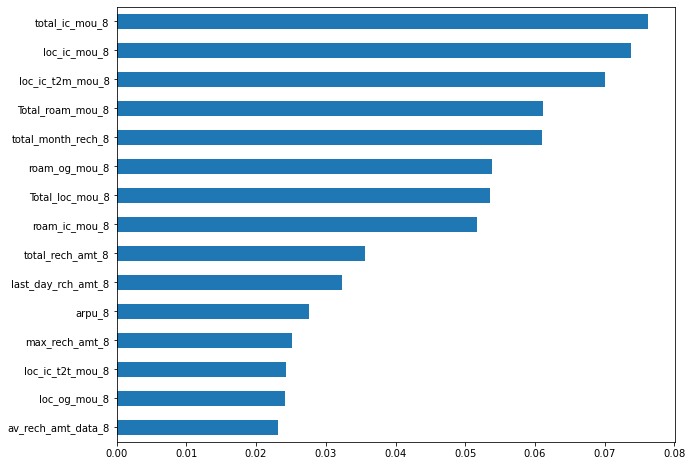

In [190]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

Top 15 predictors below:

1. **total_ic_mou_8** -- *Total incoming minutes of usage in month 8*
2. **loc_ic_mou_8** -- *local incoming minutes of usage in month 8*
3. **loc_ic_t2m_mou_8** -- *local incoming calls to another operator minutes of usage in month 8*
4. **total_roam_mou_8** -- *Total incoming+outgoing roaming minutes of usage in month 8*
5. **total_month_rech_8** -- *Total month recharge amount in month 8*
6. **roam_og_mou_8** -- *outgoing roaming calls minutes of usage in month 8*
7. **Total_loc_mou_8** -- *Total local minutes of usage in month 8*
8. **roam_ic_mou_8** -- *incoming roaming calls minutes of usage in month 8*
9. **total_rech_amt_8** -- *total recharge amount in month 8*
10. **last_day_rch_amt_8** -- *last (most recent) recharge amount in month 8*
11. **arpu_8** -- *average revenue per user in month 8*
12. **max_rech_amt_8** -- *maximum recharge amount in month 8*
13. **loc_ic_t2t_mou_8** -- *local incoming calls from same operator minutes of usage in month 8*
14. **loc_og_mou_8** -- *local outgoing calls minutes of usage in month 8*
15. **av_rech_amt_data_8** -- *average recharge amount for mobile data in month 8*


Above are the top 15 features which are significant in predicting the high value customer churn. Its evident that in action month (8th month) customers behaviour provides indication about the churn.

In conclusion, any drop in these features is strong signal that the customer is not happy with the services offered and may choose to churn in the near future.

## Strategies to manage customer churn

In the telecom industry, customers can choose from multiple service providers and easily switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

Hence, retaining high profitable customers is the number one business goal.

1. **Keep watch on sudden decrease in service usage**

    - As seen , the decrease in service usage by customer is significant predictor of the churn.
    - Few features like incoming and outgoing Minuts of usage, ARPU, Average rechage amount , average data usage  should be checked regularly to predict the churn
    - Contact these customers proactively to find out what's affecting their experience and offer them discounts to continue to use the services
    - Innovative marketing strategies or campaigns should be organised to retain the high value customers
   

2. **Improve Outgoing services**

    -  It has been observed that , initially churner's outgoing usage was more than that of non-churners. Gradually  they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider.
    - The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
    - Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
    - New campaigns which targets the customers with high outgoing usage be rolled out.Like,
        - Discounted outgoing rates during particular hours of the day for these customers.
        - For every X mou, grant customer with some % of X free mou.
        - Investigate and if need be revise the outgoing tarrifs to make it competitive.
        - Free monthly outgoing mou's depending on the users past roaming mou usage.
       

3. **Suggestions on Roaming services**

    - It is obsererved that churners use high roaming services than non-churners and the usage has been drastically decresed from jun till july. Probably reason for churn here would be due to high tariffs on roaming service or bad call quality during roaming. It is suggested to network operators to investigate on the roaming related issues.
    - It could be possible that competative roaming services are avaliable in the market by other operators. Suggesting operator to do market study on the roaming plans and come up with better roaming services to customers.
    - Due to roaming its possible network quality in some geo location may not be good. Suggesting service provider to identify such locations and improve the network avaliability in those areas as well.
    - Come up with new marketing campaigns and offers which keeps high value customers happy and engaged with the services. It could be by providing discounts on the roaming rates or waving off the roaming across selected (or neighbouring) circle_ids.

4. Constantly answer customer feedback on all channels. Especially social media.

5. Use incentives to create non-cash mobile rewards programs

6. As every user has different purpose and usage pattern personalised tariff plans and service recommondation will be helpfull.